In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import diags
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
class ADI(object):
    def __init__(self, T, alpha, dx, dt):
        self.T = T
        self.alpha = alpha
        self.nx, self.ny = T.shape
        self.x = np.arange(self.nx)
        self.y = np.arange(self.ny)
        self.X, self.Y = np.meshgrid(self.x, self.y, indexing='ij')
        self.dx = dx
        self.dt = dt
        self.r = self.alpha * self.dt / (self.dx ** 2)
        self.temp_bnd = 0.0
        self.Ax = None
        self.Ay = None
        self.Bx = None
        self.By = None
        self.set_A_mtx('x')
        self.set_A_mtx('y')
        self.set_B_mtx('x')
        self.set_B_mtx('y')
        
    def set_A_mtx(self, direction):
        if direction == 'x':
            diag = (1 + 2 * self.r) * np.ones([1, self.nx])
            off_diag = - self.r * np.ones([1, self.nx - 1])
            diag_list = [diag, off_diag, off_diag]
            shape = (self.nx, self.nx)
            self.Ax = diags(diag_list, [0, -1, 1], shape=shape).toarray()
        elif direction == 'y':
            diag = (1 + 2 * self.r) * np.ones([1, self.ny])
            off_diag = - self.r * np.ones([1, self.ny - 1])
            diag_list = [diag, off_diag, off_diag]
            shape = (self.ny, self.ny)
            self.Ay = diags(diag_list, [0, -1, 1], shape=shape).toarray()
            
    def set_B_mtx(self, direction):
        if direction == 'x':
            diag = (1 - 2 * self.r) * np.ones([1, self.nx])
            off_diag = self.r * np.ones([1, self.nx - 1])
            diag_list = [diag, off_diag, off_diag]
            shape = (self.nx, self.nx)
            self.Bx = diags(diag_list, [0, -1, 1], shape=shape).toarray()
        elif direction == 'y':
            diag = (1 - 2 * self.r) * np.ones([1, self.ny])
            off_diag = self.r * np.ones([1, self.ny - 1])
            diag_list = [diag, off_diag, off_diag]
            shape = (self.ny, self.ny)
            self.By = diags(diag_list, [0, -1, 1], shape=shape).toarray()
            
    def apply_boundary(self):
        self.T[0, :] = self.temp_bnd
        self.T[-1, :] = self.temp_bnd
        self.T[:, 0] = self.temp_bnd
        self.T[:, -1] = self.temp_bnd
        
    def run(self,num_t):
        for t in range(num_t):
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            ax.set_zlim(0,1)
            for j in range(ny):
                temp = self.T[:, j]
                b = np.matmul(self.Bx, temp)
                self.T[:, j] = np.linalg.solve(self.Ax, b)
                
            for i in range(nx):
                temp = self.T[i]
                b = np.matmul(self.By, temp)
                self.T[i] = np.linalg.solve(self.Ay, b)
                
            self.apply_boundary()
            ax.plot_surface(self.X, self.Y, self.T, cmap='autumn')
            plt.show()

In [5]:
alpha = 0.2
nx, ny = 80, 40
dt = 0.02
dx = 0.05
temp = np.zeros([nx, ny])
nx_s = nx // 3
ny_s = ny // 3
temp[nx_s:-nx_s, ny_s:-ny_s] = 1.0

In [6]:
adi = ADI(temp, alpha, dx, dt)

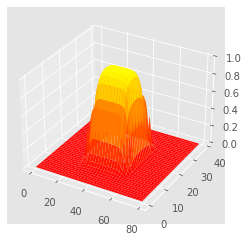

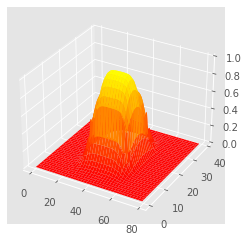

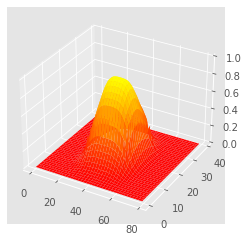

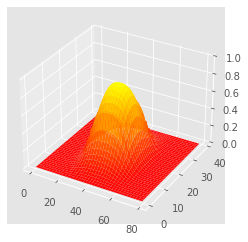

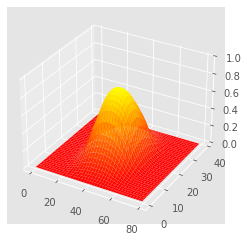

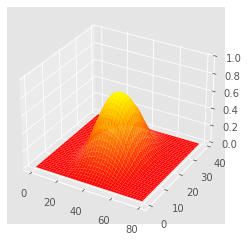

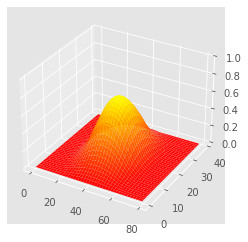

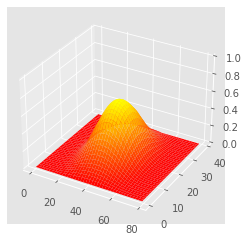

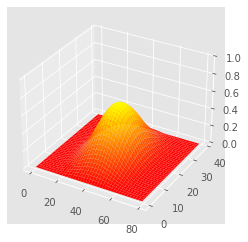

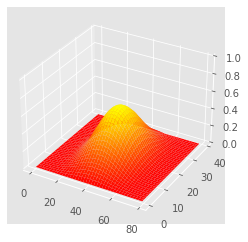

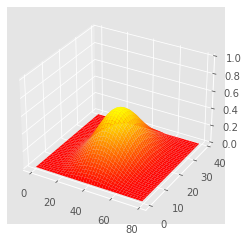

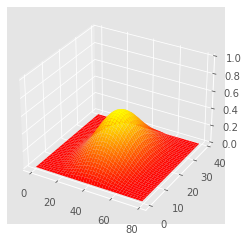

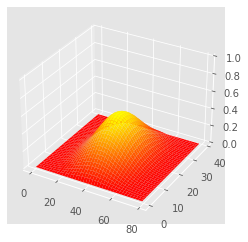

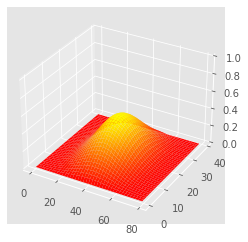

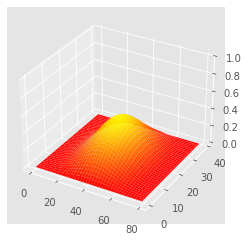

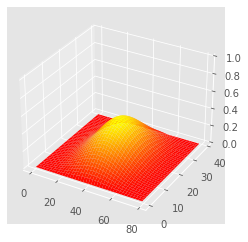

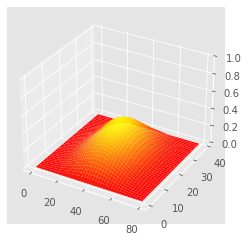

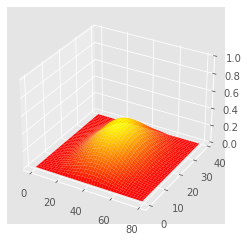

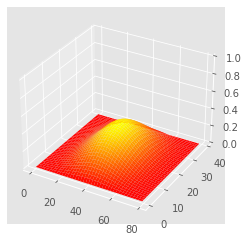

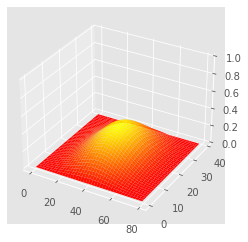

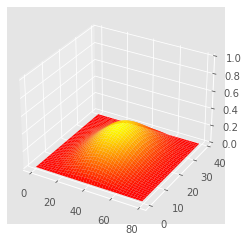

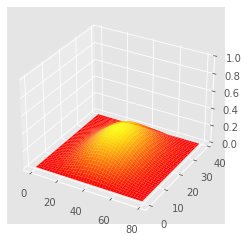

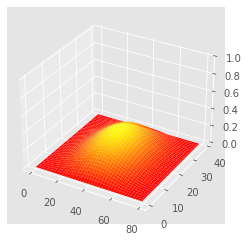

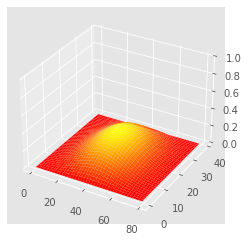

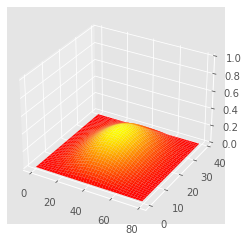

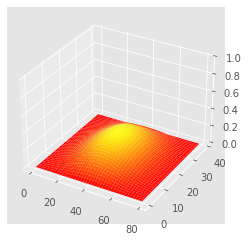

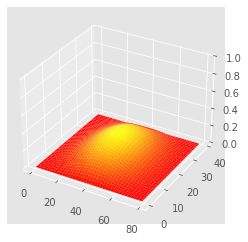

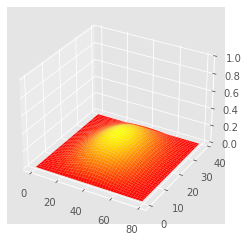

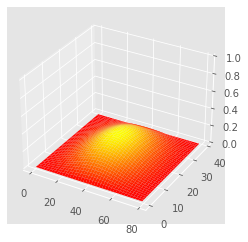

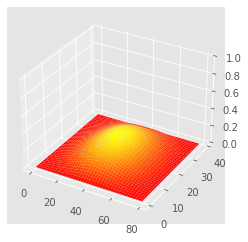

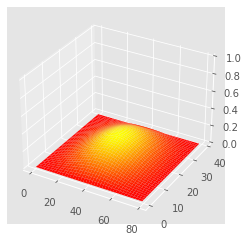

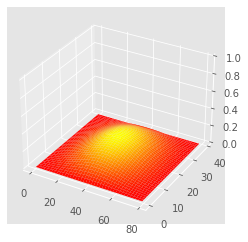

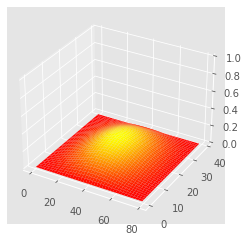

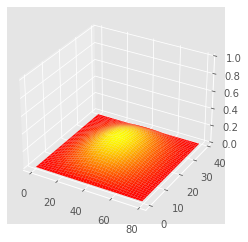

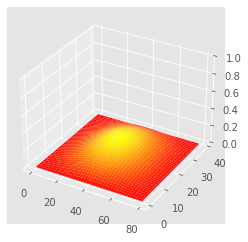

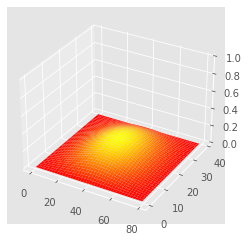

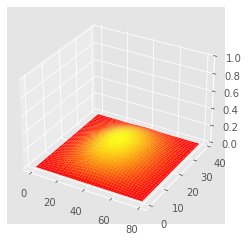

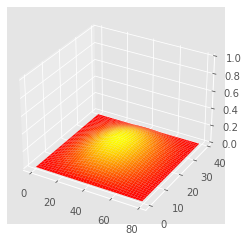

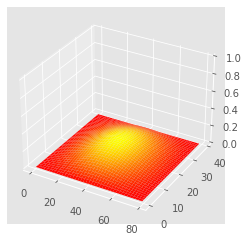

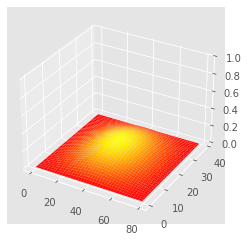

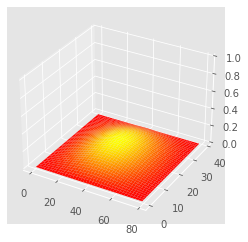

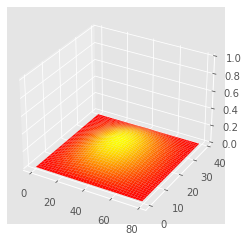

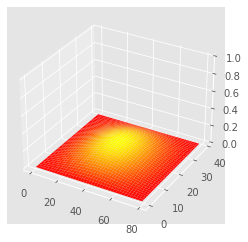

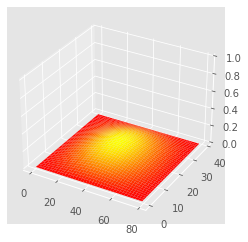

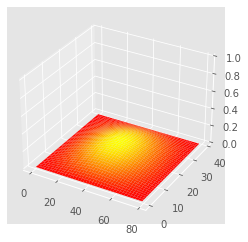

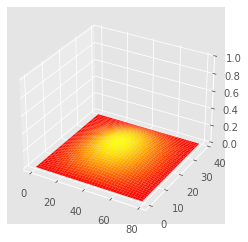

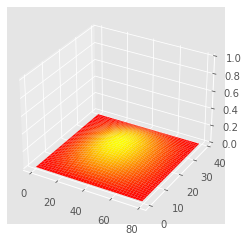

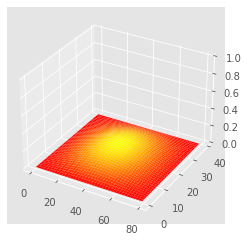

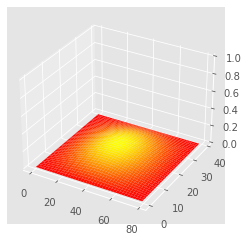

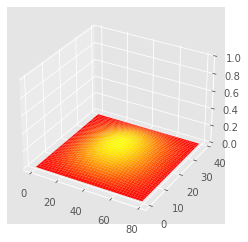

In [7]:
adi.run(50)